## Training Convolutional Neural Network

### Starting with normal images

In [15]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [16]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [17]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_test.shape[1])
num_classes = y_test.shape[1]
print(X_train.shape)
print(X_test.shape)

10
(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [19]:
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

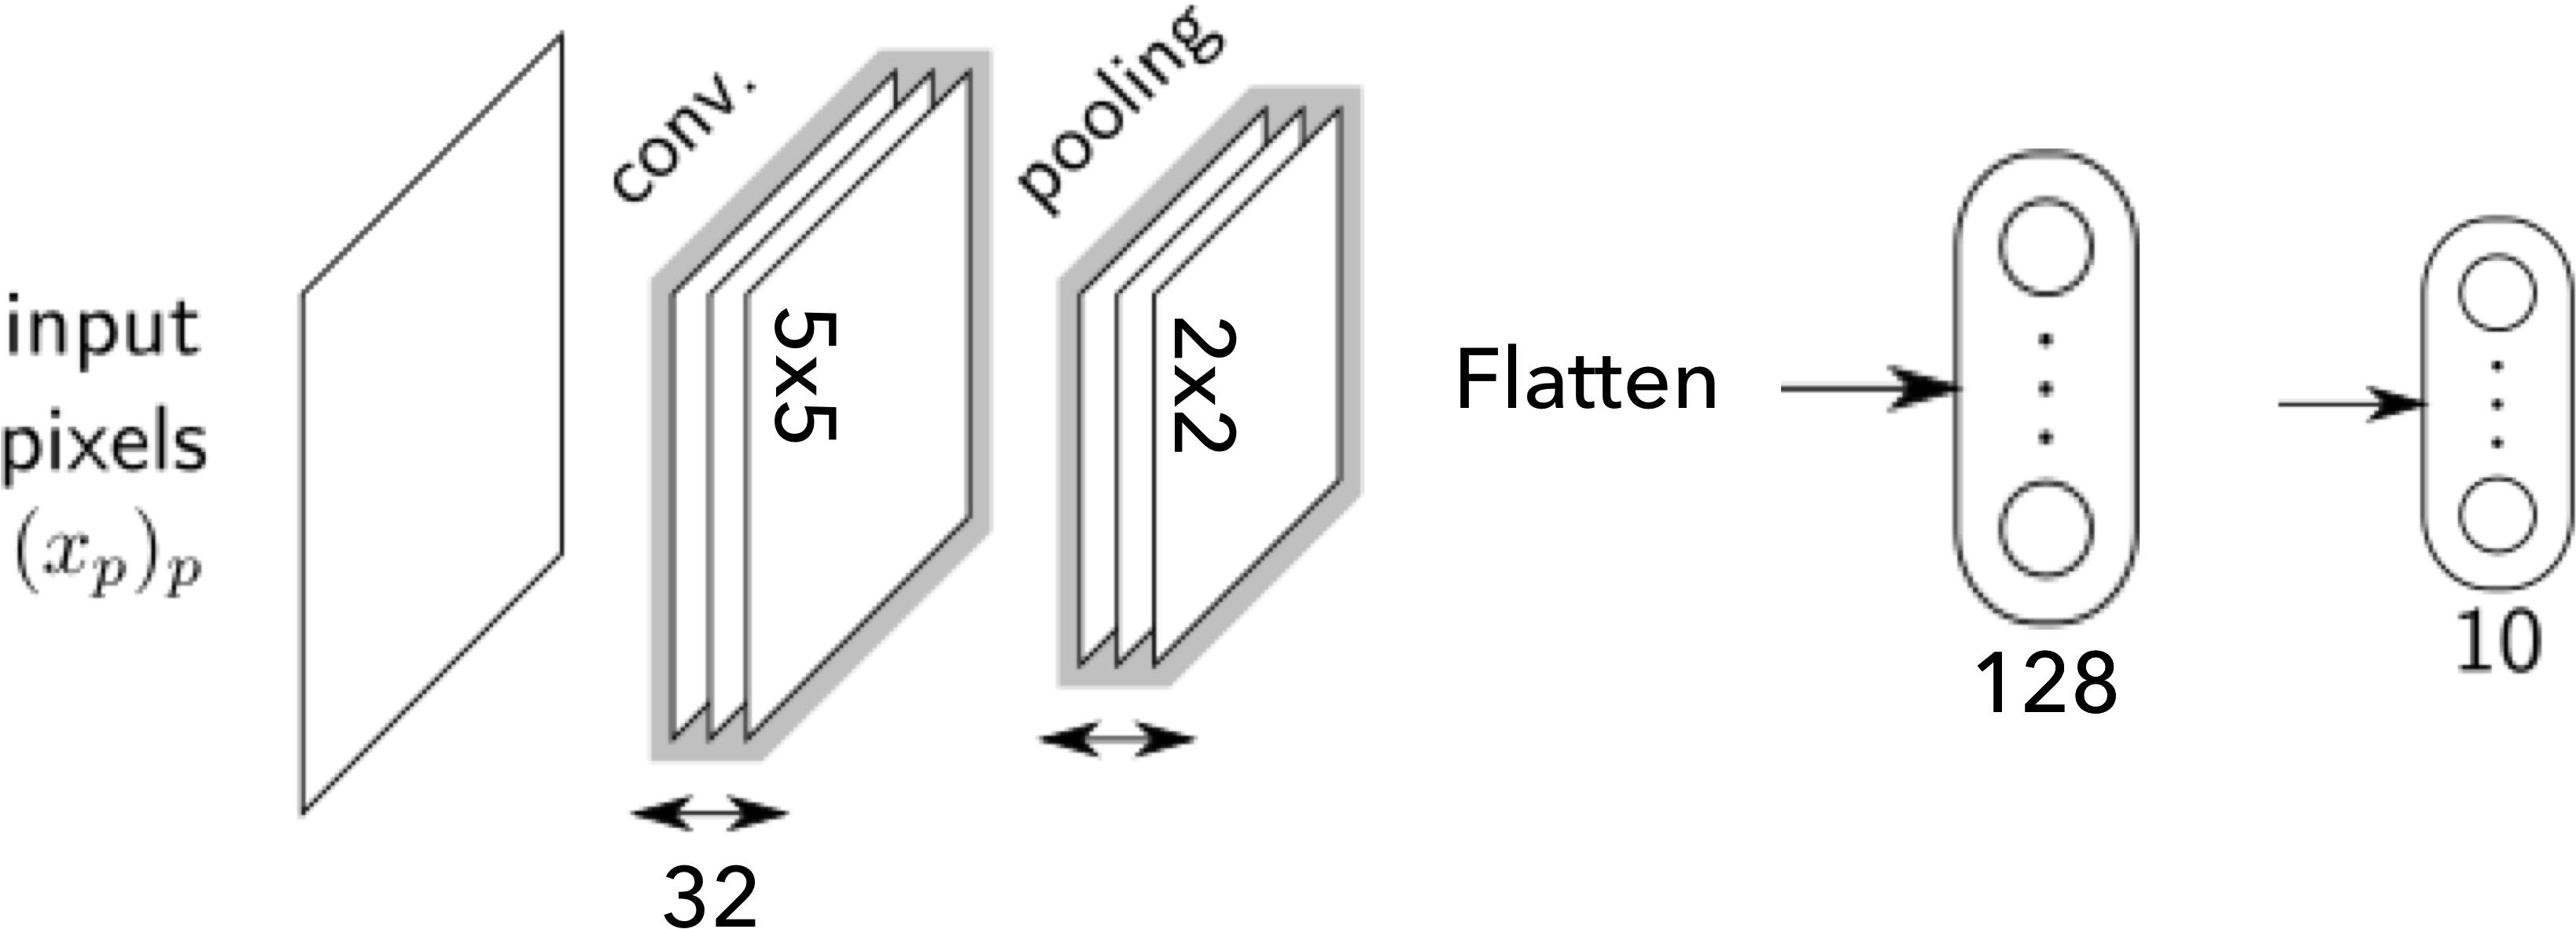

In [20]:
# build the model
model = cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 215s - loss: 0.2464 - acc: 0.9279 - val_loss: 0.0808 - val_acc: 0.9758
Epoch 2/10
 - 184s - loss: 0.0724 - acc: 0.9788 - val_loss: 0.0489 - val_acc: 0.9851
Epoch 3/10
 - 198s - loss: 0.0526 - acc: 0.9838 - val_loss: 0.0412 - val_acc: 0.9865
Epoch 4/10
 - 274s - loss: 0.0408 - acc: 0.9876 - val_loss: 0.0406 - val_acc: 0.9876
Epoch 5/10
 - 224s - loss: 0.0320 - acc: 0.9900 - val_loss: 0.0353 - val_acc: 0.9882
Epoch 6/10
 - 209s - loss: 0.0280 - acc: 0.9909 - val_loss: 0.0341 - val_acc: 0.9878
Epoch 7/10
 - 236s - loss: 0.0225 - acc: 0.9927 - val_loss: 0.0366 - val_acc: 0.9879
Epoch 8/10
 - 246s - loss: 0.0200 - acc: 0.9937 - val_loss: 0.0339 - val_acc: 0.9887
Epoch 9/10
 - 218s - loss: 0.0166 - acc: 0.9949 - val_loss: 0.0467 - val_acc: 0.9858
Epoch 10/10
 - 234s - loss: 0.0151 - acc: 0.9952 - val_loss: 0.0369 - val_acc: 0.9880
CNN Error: 1.20%


In [22]:
print(f'{scores[1]*100}%')

98.8%


In [27]:
averages = [0.8748548387096774, 0.9263161290322584, 0.9558612903225807, 0.973883870967742, 0.9808870967741936, 0.9860193548387097, 0.9891806451612905, 0.9910483870967741]

In [28]:
print(len(averages))

8


### Comparing results with standard neural network

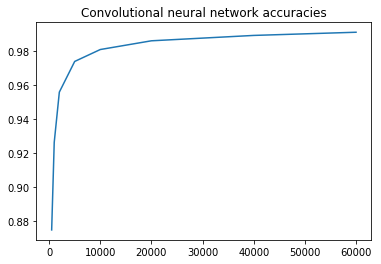

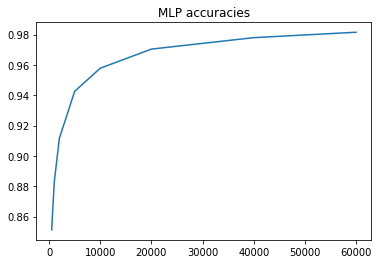

CNN averages: [0.8748548387096774, 0.9263161290322584, 0.9558612903225807, 0.973883870967742, 0.9808870967741936, 0.9860193548387097, 0.9891806451612905, 0.9910483870967741]
MLP averages: [0.8511548387096777, 0.8823999999999996, 0.9115645161290319, 0.9426000000000007, 0.957812903225807, 0.9704290322580648, 0.9779645161290328, 0.9815387096774097]

Differences:
2.37%
4.39%
4.43%
3.13%
2.31%
1.56%
1.12%
0.95%


In [38]:
plt.figure()
plt.title("Convolutional neural network accuracies")
plt.plot([500, 1000, 2000, 5000, 10000, 20000, 40000, 60000], averages)
plt.show()

MLP_averages = [0.8511548387096777, 0.8823999999999996, 0.9115645161290319, 0.9426000000000007, 0.957812903225807, 0.9704290322580648, 0.9779645161290328, 0.9815387096774097]

plt.figure()
plt.title("MLP accuracies")
plt.plot([500, 1000, 2000, 5000, 10000, 20000, 40000, 60000], MLP_averages)
plt.show()

diff = []
for i in range(len(averages)):
    diff.append((averages[i] - MLP_averages[i])*100)

print(f"CNN averages: {averages}")
print(f"MLP averages: {MLP_averages}")
print("\nDifferences:")
for perc in diff:
    print(f'{round(perc,2)}%',)

### CNN trained on inverted and non-inverted images

In [ ]:
# load data
(_X_train, _y_train), (_X_test, _y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = (_X_train.reshape(_X_train.shape[0], 1, 28, 28).astype('float32') / 255)[:500,:]
X_test = (_X_test.reshape(_X_test.shape[0], 1, 28, 28).astype('float32') / 255)
# one hot encode outputs
y_train = np_utils.to_categorical(_y_train)[:500,:]
y_test = np_utils.to_categorical(_y_test)
print(y_test.shape[1])
num_classes = y_test.shape[1]
print(X_train.shape)
print(X_test.shape)

In [ ]:
trialsInv = []
accsInv = []
accuraciesInv = 0
examples = 500
counts = [1000, 2000, 5000, 10000, 20000, 40000, 60000]
k = 0
averagesInv = []

# build the model
model = cnn_model()

while examples <= 60000:
    X_train = (_X_train.reshape(_X_train.shape[0], 1, 28, 28).astype('float32') / 255)[:examples,:]
    inverted_x_train = (255 - _X_train.reshape(_X_train.shape[0], 1, 28, 28).astype('float32') / 255)[:examples,:]
    X_train = np.concatenate((X_train, inverted_x_train), axis=0)
    y_train = np_utils.to_categorical(_y_train)[:examples,:]
    y_train = np.concatenate((y_train, y_train), axis=0)
    for i in range(1,32):
        print(f"{examples} examples - Trial number: {i}")
        # Fit the model
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=0)
        acc = model.evaluate(X_test, y_test, verbose=0)[1]
        trial = "| {0} | {1} |".format(i,  acc)
        accsInv.append(acc)
        accuraciesInv += acc
        trialsInv.append(trial)
    average = accuraciesInv / 31
    averagesInv.append(average)
    accuraciesInv = 0
    for t in trialsInv:
        print(t)
    trialsInv = []
    print(f"Average: {average}")
    if examples != 60000:
      examples = counts[k]
      k += 1

In [47]:
averagesInv = [0.871416129032258, 0.9233129032258064, 0.9556967741935484, 0.9744548387096775, 0.9818419354838709, 0.9858322580645162, 0.9890032258064517, 0.9905580645161289]
print(f"CNN with normal images: {averages}\n")
print(f"CNN with both inverted and non-inverted: {averagesInv}")

diff2 = []
for i in range(len(averages)):
    diff2.append((averages[i] - averagesInv[i])*100)
    
print("\nDifferences:")
for perc in diff2:
    print(f'{round(perc,2)}%',)

CNN with normal images: [0.8748548387096774, 0.9263161290322584, 0.9558612903225807, 0.973883870967742, 0.9808870967741936, 0.9860193548387097, 0.9891806451612905, 0.9910483870967741]

CNN with both inverted and non-inverted: [0.871416129032258, 0.9233129032258064, 0.9556967741935484, 0.9744548387096775, 0.9818419354838709, 0.9858322580645162, 0.9890032258064517, 0.9905580645161289]

Differences:
0.34%
0.3%
0.02%
-0.06%
-0.1%
0.02%
0.02%
0.05%
